In [16]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import scipy.stats as stats

In [17]:

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")


Running on PyMC v5.10.0


In [24]:
#set constants
true_p_A = 0.05
true_p_B = 0.04
N_A = 1500
N_B = 750

#generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [ ]:
print(np.mean(observations_A))
print(np.mean(observations_B))

In [25]:
#include the observations, which are Bernoulli
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    delta = pm.Deterministic("delta", p_A - p_B)
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    trace = pm.sample()
    print(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_A, p_B]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data


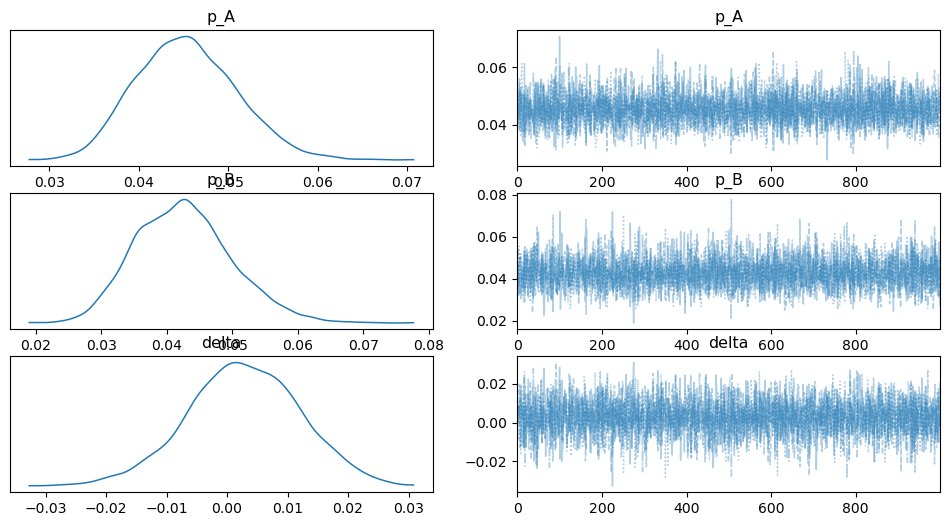

In [26]:
az.plot_trace(trace, combined=True);

In [27]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_A,0.045,0.006,0.035,0.055,0.0,0.0,4235.0,2668.0,1.0
p_B,0.043,0.007,0.029,0.056,0.0,0.0,4074.0,2972.0,1.0
delta,0.003,0.009,-0.015,0.020,0.0,0.0,4083.0,3110.0,1.0


In [31]:
# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
delta_samples = trace.posterior["delta"]

print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_samples > 0))

Probability site A is WORSE than site B: 0.381
Probability site A is BETTER than site B: 0.619
